In [0]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import math


Función para graficar espacio solución en2d y 3d  solo dos parámetros

In [0]:
def searchSpace(objective,dsignParms):
  if len(dsignParms)==1:
    x = np.linspace(dsignParms[0][1], dsignParms[0][2], 50)
    z=np.zeros(x.shape)
    for index,value in enumerate(x):
      
      z[index]=objective.subs([(dsignParms[0][0],value)])
    fig=plt.figure()  
    axes=fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(x,z) 
    
  if len(dsignParms)==2:
    x = np.linspace(dsignParms[0][1], dsignParms[0][2], 50)
    y = np.linspace(dsignParms[1][1], dsignParms[1][2], 50)
    xv,yv = np.meshgrid(x, y)
  
    mi,mj=xv.shape
    z=np.zeros(xv.shape)
    for i in range(mi):
      for j in range(mj):
        z[i,j]=objective.subs([(dsignParms[0][0],xv[i,j]),(dsignParms[1][0],yv[i,j])])
    fig=plt.figure()  
    axes=Axes3D(fig)
    surf = axes.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  return fig,axes

In [0]:
def gradientPrint(objective,fig, axes, Historic):
  if len(Historic[0])==1:
    x=list()
    z=list()
    for data in Historic: 
      z.append(objective.subs(data))
      x.append(data[0][1])
    axes.plot(x,z,c='r',marker='h') 
    fig
  if len(Historic[0])==2:
    x=list()
    y=list()
    z=list()
    for data in Historic:
      z.append(objective.subs(data))
      x.append(data[0][1])
      y.append(data[1][1])
    axes.plot(x,y,z,c='r',marker='h') 

Algoritmo de gradiente descendente  

In [0]:
def gradDesc(objective,dsignParms,mu,iterations):
  Historic=list()
  objPrime=list()
  i=0
  new=copy.deepcopy(dsignParms)
  Historic.append(new)
  for index,init in enumerate(dsignParms):
    objPrime.append(objective.diff(init[0]))
  for i in range(iterations):  
    for index,init in enumerate(dsignParms):
      Grad=objPrime[index].subs(dsignParms)
      dsignParms[index][1]=dsignParms[index][1]-mu*Grad
      new=copy.deepcopy(dsignParms)
      Historic.append(new)

  return Historic,dsignParms
      
    
    
    

Planteamiento del problema caso del máximo volumen de una caja

[[x, 7.55952630330718]]
[[[x, 41]], [[x, 39.3702795954789]], [[x, 37.8066166627088]], [[x, 36.3064414898231]], [[x, 34.8672930356638]], [[x, 33.4868150184891]], [[x, 32.1627521840338]], [[x, 30.8929467446939]], [[x, 29.6753349812428]], [[x, 28.5079439979660]], [[x, 27.3888886214064]], [[x, 26.3163684320108]], [[x, 25.2886649168437]], [[x, 24.3041387301517]], [[x, 23.3612270469035]], [[x, 22.4584409924809]], [[x, 21.5943631294383]], [[x, 20.7676449796993]], [[x, 19.9770045577468]], [[x, 19.2212238873386]], [[x, 18.4991464711641]], [[x, 17.8096746797959]], [[x, 17.1517670235151]], [[x, 16.5244352684116]], [[x, 15.9267413569880]], [[x, 15.3577940938202]], [[x, 14.8167455592608]], [[x, 14.3027872193662]], [[x, 13.8151457088981]], [[x, 13.3530782770393]], [[x, 12.9158679028907]], [[x, 12.5028181100988]], [[x, 12.1132475368839]], [[x, 11.7464843484439]], [[x, 11.4018606116008]], [[x, 11.0787067841639]], [[x, 10.7763465005468]], [[x, 10.4940918568121]], [[x, 10.2312394084501]], [[x, 9.9870670

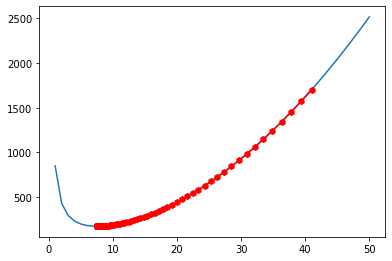

In [9]:

x=Symbol('x')

A=(864/x)+x**2

Historic,solution=gradDesc(A,[[x,41]],0.02,200)
print(solution)
print(Historic)


fig,axes=searchSpace(A,[[x,0,50]])
gradientPrint(A,fig, axes, Historic)

GRAMACY & LEE (2012) FUNCTION



[[x, 1.74357674046943]]
[[[x, 1.7]], [[x, 1.73147191357164]], [[x, 1.74460241873369]], [[x, 1.74342726212152]], [[x, 1.74359808966493]], [[x, 1.74357368156621]], [[x, 1.74357717855093]], [[x, 1.74357667772545]], [[x, 1.74357674945582]], [[x, 1.74357673918237]], [[x, 1.74357674065377]], [[x, 1.74357674044303]], [[x, 1.74357674047322]], [[x, 1.74357674046889]], [[x, 1.74357674046951]], [[x, 1.74357674046942]], [[x, 1.74357674046944]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.74357674046943]], [[x, 1.743576

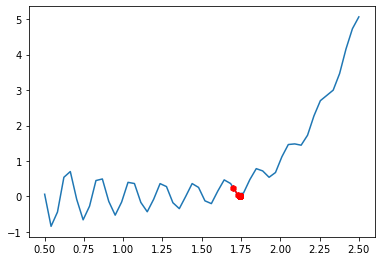

In [18]:
x=Symbol('x')

A=(sin(10*math.pi*x)/(2*x))+(x-1)**4

Historic,solution=gradDesc(A,[[x,1.7]],.004,200)
print(solution)
print(Historic)


fig,axes=searchSpace(A,[[x,0.5,2.5]])
gradientPrint(A,fig, axes, Historic)


Optimización de la función beale


[[x, 1.00013118311067], [y, 2.99987170320993]]


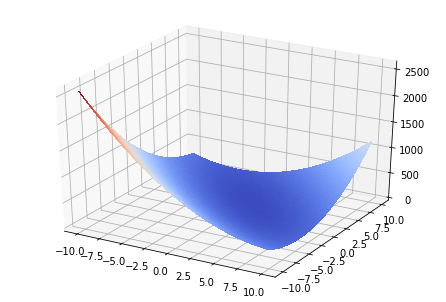

In [20]:
x=Symbol('x')
y=Symbol('y')

f=(x+2*y-7)**2+(2*x+y-5)**2
Historic,solution=gradDesc(f,[[x,8],[y,7]],0.02,200)

print(solution)

fig, axes=searchSpace(f,[[x,-10,10],[y,-10,10]])
gradientPrint(f,fig, axes, Historic)

Optimización función esferica

[[x, 2.43004586467059e-7], [y, 3.24006115289413e-7]]
[[x, -1.62003057644706e-7], [y, -3.24006115289413e-7]]


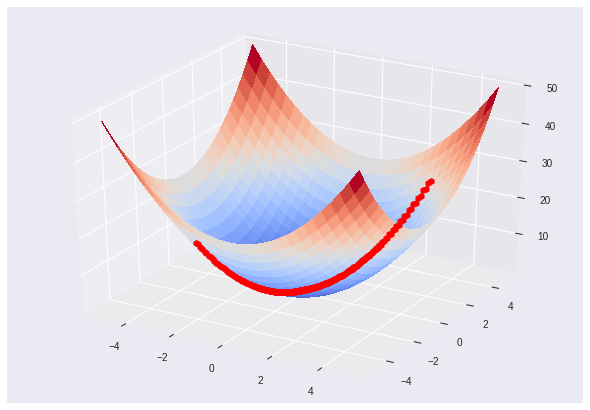

In [0]:
x=Symbol('x')
y=Symbol('y')

f=x**2+y**2
Historic,solution=gradDesc(f,[[x,3],[y,4]],0.02,400)

print(solution)

fig, axes=searchSpace(f,[[x,-5,5],[y,-5,5]])
gradientPrint(f,fig, axes, Historic)

Historic,solution=gradDesc(f,[[x,-2],[y,-4]],0.02,400)

print(solution)

gradientPrint(f,fig, axes, Historic)


#Historic,solution=gradDesc(f,[[x,2],[y,-4]],0.02,400)

#print(solution)

#gradientPrint(f,fig, axes, Historic)

#Historic,solution=gradDesc(f,[[x,-2],[y,4]],0.02,400)

#print(solution)

#gradientPrint(f,fig, axes, Historic)

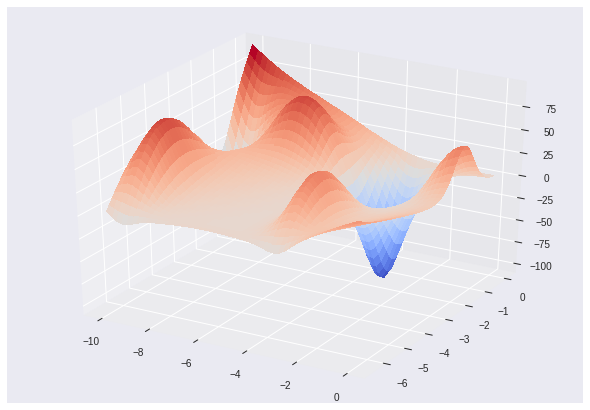

In [0]:
x=Symbol('x')
y=Symbol('y')

A=sin(y)*exp((1-cos(x))**2)+cos(x)*exp((1-sin(y))**2)+(x-y)**2
Historic,solution=gradDesc(A,[[x,-4],[y,-4]],0.02,60)

print(solution)

fig, axes=searchSpace(A,[[x,-10,0],[y,-6.5,0]])
gradientPrint(A,fig, axes, Historic)